<center><h1>Cluster Images With the K-Means Algorithm</h1></center>
<hr><hr>

<br><br><br>

<div class="alert alert-block" style="margin-top: 20px">
    <h4>
        Released By El Houcine ES SANHAJI 
    </h4>
    Data Science Student
</div>

## Contents
<b>
    <ul>
        <li>1- K-Means Algorithm</li>
        <li>2- Kmeans on Image Compression</li>
        <li>3- Question 2</li>
    </ul>
</b>

<br>

## 1- K-Means Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.<br>
The way kmeans algorithm works is as follows:<br>
* Specify number of clusters K.
* Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
* Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

<br>

## 2- Kmeans on Image Compression

In this part, we will implement kmeans alogorithm to compress an image.<br>
The image that we work on is ``2250 x 2250 x 3``.<br>
Therefore, for each pixel location we would have 3 ``8-bit`` integers that specify the red, green, and blue intensity values.<br>
Our goal is to reduce the number of colors to ``7`` and represent <b>compress</b> the photo using those ``7 colors`` only.<br>
To pick which colors to use, we’ll use ``kmeans algorithm`` on the image and treat every pixel as a data point.<br>
That means reshape the image from <b>height x width x channels</b> to <b>(height * width) x channel</b>, i,e we would have <b>2250x 2250= 5,062,500 data points in 3-dimensional space which are the intensity of RGB</b>.<br>
Doing so will allow us to represent the image using the ``7 centroids for each pixel`` and would significantly reduce the size of the image by a factor of 6.
The original image size was ``2250 x 2250 x 24 = 121,500,000 bits`` however, the new compressed image would be ``7 x 24 + 2250 x 2250 x 4 = 20,250,168 bits ``.
The huge difference comes from the fact that we’ll be using centroids as a lookup for pixels’ colors and that would reduce the size of each pixel location to 4-bit instead of 8-bit.

Importing the necessary libraries such as numpy, pandas and scikit-learn and more.

In [1]:
from sklearn import cluster
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [29]:
%matplotlib inline
plt.style.use('ggplot')

Read the image

In [3]:
img = imageio.imread('image.jpg')
img_size = img.shape

Reshape it to be 2-dimension

In [4]:
X = img.reshape(img_size[0] * img_size[1], img_size[2])

Run the Kmeans algorithm

In [5]:
km = cluster.KMeans(n_clusters=7)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Use the centroids to compress the image

In [6]:
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

Reshape ``X_recovered`` to have the same dimension as the original image ``2250 * 2250 * 3``

In [7]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

Plot the original and the compressed image next to each other

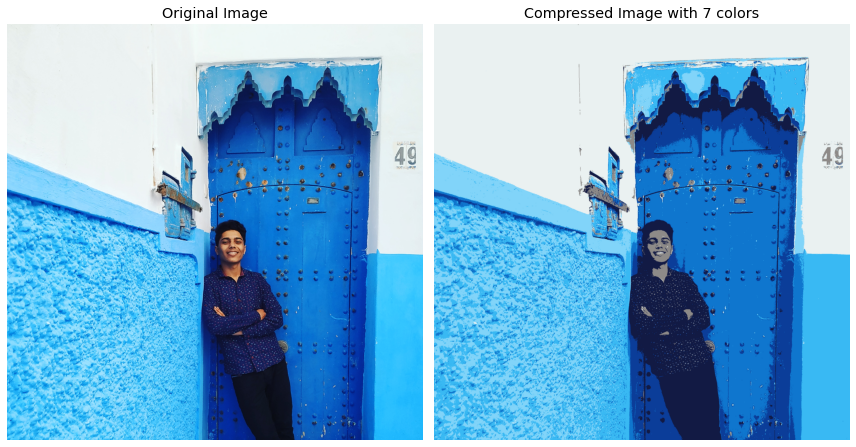

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 7 colors')

for ax in fig.axes:
    ax.axis('off')

plt.tight_layout();

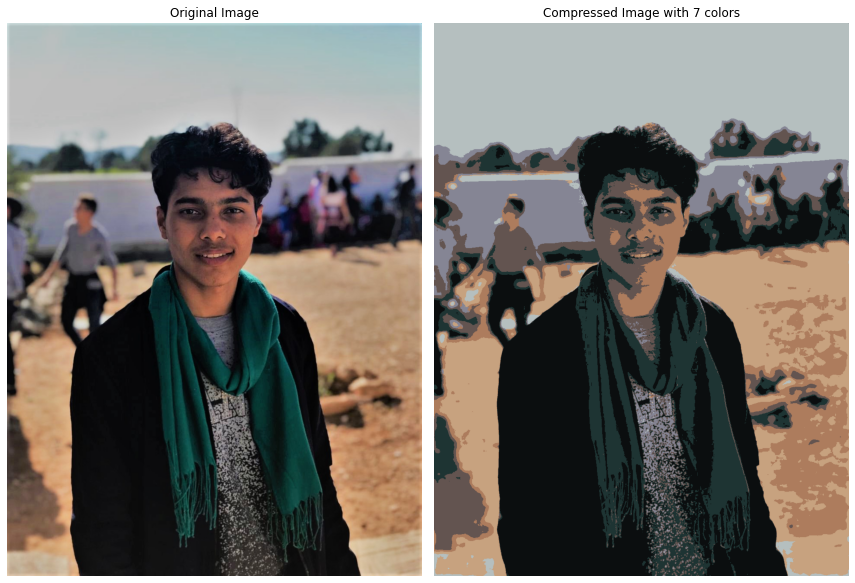

<br>

## 3- Applications

#### Que fait le programme suivant et donner le résultat pour le fichier fromage.txt

Classification ascendante hiérarchique Utilisation du package «scipy»

Importing the necessary libraries such as numpy, pandas and scikit-learn and more.

In [9]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import pandas as pd
import os

In [10]:
os.chdir(os.getcwd())

Importing data with pandas in ``fromage.txt``

In [12]:
fromage = pd.read_table("fromage.txt", sep="\t", header=0, index_col=0)

In [13]:
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [14]:
fromage.shape

(29, 9)

In [15]:
fromage.dtypes

calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object

In [17]:
pd.DataFrame(fromage.describe())

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


In [18]:
fromage.columns

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

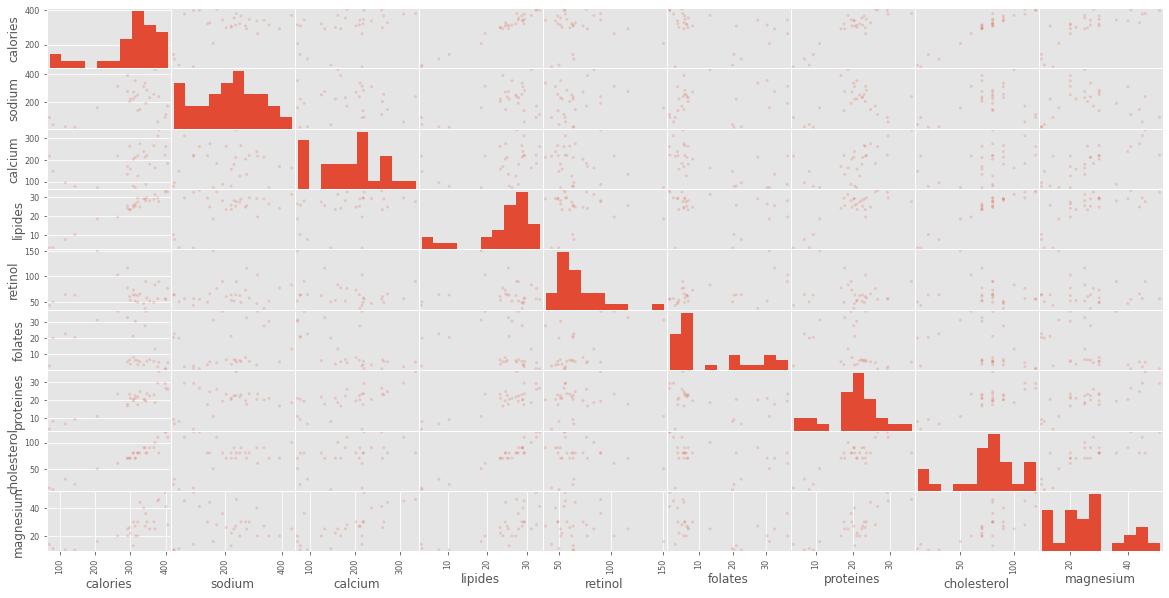

In [35]:
plt.figure(figsize=(20, 10))
df=fromage[['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates', 'proteines', 'cholesterol', 'magnesium']]
_ = scatter_matrix(df, alpha=0.2, figsize=(20, 10))

In [21]:
Z = linkage(fromage, method='ward', metric='euclidean')

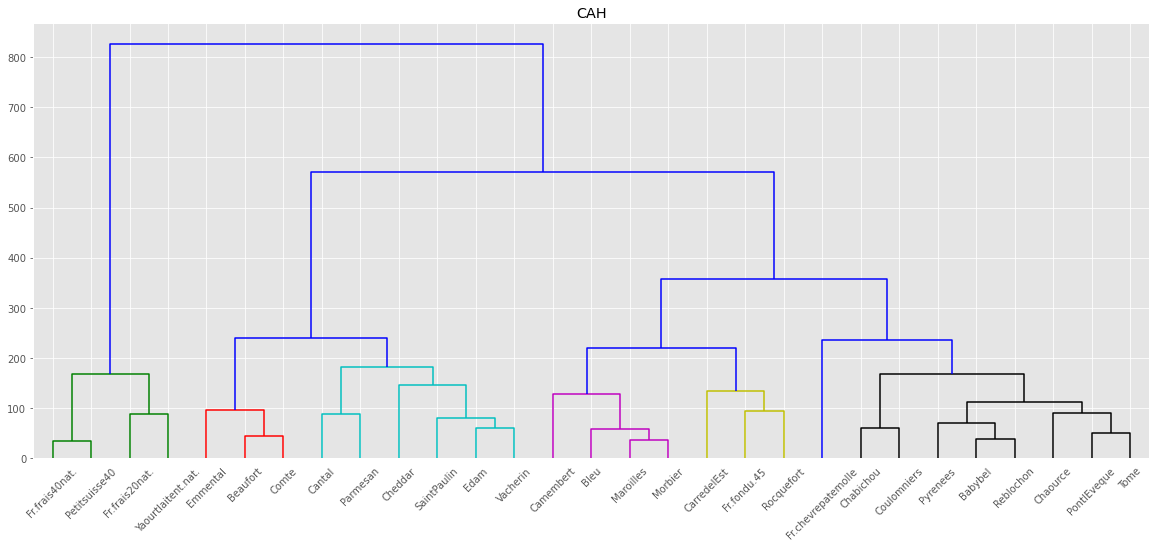

In [32]:
plt.figure(figsize=(20, 8))
plt.title("CAH")
dendrogram(Z, labels=fromage.index, orientation='top', color_threshold=200)
plt.show()

In [36]:
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


<div class="alert alert-block" style="margin-top: 20px">
    <h4>
        Released By El Houcine ES SANHAJI 
    </h4>
    Data Science Student
</div>

# Thank You.